# Đặt vấn đề
Trong nhiều tường hợp, chúng ta có rất hạn chế số lượng dữ liệu xây dựng mô hình. Nếu lấy quá nhiều dữ liệu trong tập training ra làm dữ liệu validation, phần dữ liệu còn lại của tập training là không đủ để xây dựng mô hình. Lúc này, tập validation phải thật nhỏ để giữ được lượng dữ liệu cho training đủ lớn. Tuy nhiên, có một vấn đề khác nyả sinh. Khi tập validation quá nhỏ, hiện tượng overfitting lại có thể xảy ra với tập training còn lại. Giải pháp cho vấn đề này chính là `cross-validation`.

**Cross validation** là một phương pháp thống kê được sử dụng để ước lượng hiệu quả của các mô hình học máy. Nó thường được sử dụng để so sánh và chọn ra mô hình tốt nhất cho một bài toán. Kỹ thuật này dễ hiêu, dễ thực hiện và cho ra cả ước lượng tin cây hơn so với các phương pháp khác. Một cách thường được sử dụng là chia tập training ra $k$ tập con khônng có phần tử chung, có kích thước gần bằng nhau. Tại mỗi lần kiểm thử, được gọi là *run*, một trong số $k$ tập con được lấy ra làm validation set. Mô hình sẽ đươc xây dựng dựa vào hợp của $k-1$ tập con còn lại. Mô hình cuối cùng xác định dựa trên trung bình của các *train error* và *validation error*. Cách này có tên gọi là **k-fold cross validation**.


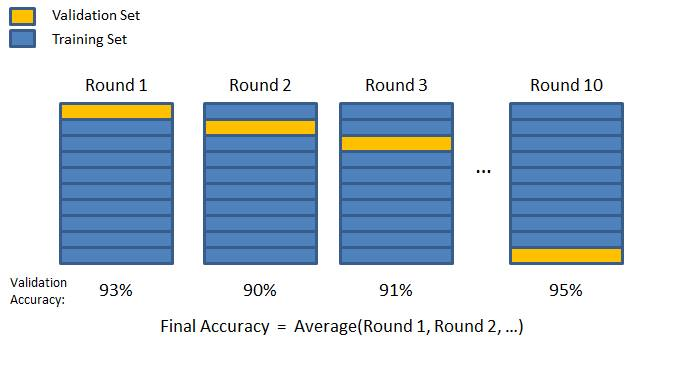

In [5]:
from IPython.display import display, Image
display(Image(filename='./images/1.png'))


# K-fold cross validation

Kỹ thuật này thường bao gồm các bước sau:
1. Xáo trộn dataset một cách ngẫu nhiên
2. Chia dataset thành k nhóm
3. Với mỗi nhóm:
    - Sử dụng nhóm hiện tại để đánh giá hiệu quả mô hình
    - Các nhóm còn lại được sử dụng để huấn luyện mô hình
    - Huấn luyện mô hình
    - Đánh giá và sau đó hủy mô hình
4. Tổng hợp hiệu quả của mô hình dựa từ các số liệu đánh giá

Một lưu ý quan trọng là mỗi mẫu chỉ được gán cho duy nhất một nhóm và phải ở nguyên trong nhóm đó cho đến hết quá trình. Các tiền xử lý dữ liệu như xây dựng vocabulary chỉ được thực hiện trên tập huấn luyện đã được chia chứ không được thực hiện trên toàn bộ dataset. Việc hủy mô hình sau mỗi lần đánh giá là bắt buộc, tránh trường hợp mô hình ghi nhớ nhãn của tập test trong lần đánh giá trước. Các lỗi thiết lập này dễ xảy ra và đều dẫn đến kết quả đánh giá không chính xác (thường là tích cực hơn so với thực tế).

# Cấu hình k

Giá trị k là thông số quan trọng để có thể đánh giá chính xác mô hình, vậy thì lựa chọn thông số này như thế nào?

Ba chiến thuật phổ biến để lựa chọn k:

- **Đại diện**: Giá trị của k được chọn để mỗi tập train/test đủ lớn, có thể đại diện về mặt thống kê cho dataset chứa nó.
- **k=10**: Giá trị của k được gán cố định bằng 10, một giá trị thường được sử dụng và được chứng minh là cho sai số nhỏ, phương sai thấp (thông qua thực nghiệm).
- **k=n**: Giá trị của k được gán cố định bằng n , với n là kích thước của dataset, như vậy mỗi mãu sẽ được sử dụng để đánh giá mô hình một lần. Cách tiếp cận này còn có tên leave-one-out cross-validation.
    
Giá trị k=10 là một cấu hình rất phổ biến. Bạn nên sử dụng giá trị này nếu như gặp khó khăn để lựa chọn một giá trị thích hợp cho bài toán của bạn.

# Code minh họa

In [2]:
import numpy as np
# giả sử có bộ dữ liệu như sau
data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

Tôi sẽ sử dụng giá trị $k=3$ trong ví dụ này. Có nghĩa là tôi sẽ xáo trộn dữ liệu (suffle) và chia data thành 3 nhóm). Vì tôi có 6 quan sát, mỗi nhóm sẽ có 2 quan sát.

Ví dụ:
```
Fold1: [0.5, 0.2]
Fold2: [0.1, 0.3]
Fold3: [0.4, 0.6]
```

3 mô hình sẽ được train và tính toán ví dụ như sau:
```
Model1: Trained on Fold1 + Fold2, Tested on Fold3
Model2: Trained on Fold2 + Fold3, Tested on Fold1
Model3: Trained on Fold1 + Fold3, Tested on Fold2
```

Các mô hình sau đó sẽ được hủy bỏ khi đã đánh giá xong, score được thu thập từng mô hình và lấy trung bình.

In [3]:
from sklearn.model_selection import KFold
# tham số đầu tiên là k
# tham số thứ 2 là shuffle (xáo trộn data hay không)
# tham số thứ 3 là random_state
kfold = KFold(3, True, 1)

/home/thang/Public/env_crawl/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [4]:
# liệt kê sự phân chia của Kfold

# enumerate splits
for train, test in kfold.split(data):
    print('train index: %s, test index: %s' % (train, test))
    print('train data: {}, test data: {}'.format(data[train], data[test]))
    print('-'*25)

train index: [0 3 4 5], test index: [1 2]
train data: [0.1 0.4 0.5 0.6], test data: [0.2 0.3]
-------------------------
train index: [1 2 3 5], test index: [0 4]
train data: [0.2 0.3 0.4 0.6], test data: [0.1 0.5]
-------------------------
train index: [0 1 2 4], test index: [3 5]
train data: [0.1 0.2 0.3 0.5], test data: [0.4 0.6]
-------------------------
